In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from time import time as stamp
from Layer import *

seed = int(float(str(stamp())[11:]) / 1e+4)
np.random.seed(seed)

def OneHot(label_data, num_class):
    return np.identity(num_class)[label_data]

mnist = tf.keras.datasets.mnist
np.random.seed(26)

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train[:4000].reshape(-1,28,28).astype(np.float32)/255.0
X_test = X_test[:1000].reshape(-1,28,28).astype(np.float32)/255.0

num_class = 10
y_train = y_train[:4000]
y_test = y_test[:1000]
y_train = OneHot(y_train, num_class)
y_test = OneHot(y_test, num_class)

img_shape = (1, 28, 28)
flt_shape = (10,3,3)

conv1 = Conv2D(img_shape, flt_shape, 0, 1, activation = 'relu', optimizer='Adam', name = 'conv1')
conv2 =  Conv2D(conv1.y_shape(), flt_shape, 0, 1, activation = 'relu', optimizer='Adam', name = 'conv2')
pool1 = Pooling(conv2.y_shape(), 2, 0, name = 'pool1')
d1 = Dense(pool1.y_shape_fc(), 400, optimizer='Adam', activation = 'relu', name = 'd1')
p1 = Dropout(0.5)
d2 = Dense(400, 200, optimizer='Adam', activation = 'relu', name = 'd2')
p2 = Dropout(0.5)
d3 = Dense(200, 10, optimizer='Adam', activation = 'softmax', name = 'd3')

model = Model()
model.add(conv1)
model.add(conv2)
model.add(pool1)
model.add(FCLayer())
model.add(d1)
model.add(p1)
model.add(d2)
model.add(p2)
model.add(d3)
model.fit(X_train, y_train, X_test, y_test, batch_size=20, epochs=10, alpha=0.01)

[0/10 epochs] Train Accuracy : 9.95%, Test Accuracy : 11.5%
[1/10 epochs] Train Accuracy : 92.425%, Test Accuracy : 88.2%
[2/10 epochs] Train Accuracy : 95.3%, Test Accuracy : 91.5%
[3/10 epochs] Train Accuracy : 95.75%, Test Accuracy : 92.2%
[4/10 epochs] Train Accuracy : 94.15%, Test Accuracy : 89.4%
[5/10 epochs] Train Accuracy : 97.85%, Test Accuracy : 94.6%
[6/10 epochs] Train Accuracy : 97.1%, Test Accuracy : 93.4%
[7/10 epochs] Train Accuracy : 98.675%, Test Accuracy : 95.3%
[8/10 epochs] Train Accuracy : 98.4%, Test Accuracy : 95.1%
[9/10 epochs] Train Accuracy : 98.425%, Test Accuracy : 93.0%
[10/10 epochs] Train Accuracy : 98.725%, Test Accuracy : 94.4%
Training complete! 3.0minutes, 1.34seconds


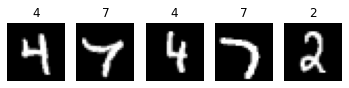

In [2]:
random_num = np.random.randint(0,1000,5)
pic = {}
fig = plt.figure()

for num, i in enumerate(random_num):
    pic[np.argmax(y_test[i])] = X_test[i]
    predict = model.predict(X_test[i].reshape(1,1,28,28))
    ax1 = fig.add_subplot(1,5,num+1)
    ax1.imshow(X_test[i],cmap='gray')
    ax1.set_title(f'{np.argmax(predict)}')
    ax1.axis("off")
    
plt.show()